In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
%cd /content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [20]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [21]:
# Load the trained model
model_path = 'car_accident_detection_model.h5'
model = load_model(model_path)

In [22]:
# Function to preprocess the image
def preprocess_image(image_path, target_size=(128, 128)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [46]:
# Load and preprocess the test image
test_image_path = 'test_images/image6.jpg'  # Replace with your test image path
test_image = preprocess_image(test_image_path)

1/1 [==============================] - 0s 35ms/step
The model predicts this image is: nonaccident


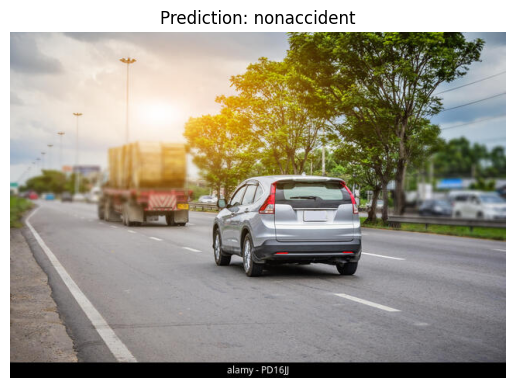

In [47]:
# Make a prediction
prediction = model.predict(test_image)
predicted_class = np.argmax(prediction, axis=1)[0]

# Interpret the prediction
classes = ['nonaccident', 'accidented']
predicted_label = classes[predicted_class]

# Display the result
print(f'The model predicts this image is: {predicted_label}')

# Display the test image
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title(f'Prediction: {predicted_label}')
plt.axis('off')
plt.show()